In [22]:
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier

In [23]:
df=load_iris()
x=df.data
y=df.target

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.tree import DecisionTreeClassifier
base_estimator=DecisionTreeClassifier()

In [26]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(estimator=base_estimator,n_estimators=100,random_state=42)

In [27]:
bg.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [28]:
y_pred=bg.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

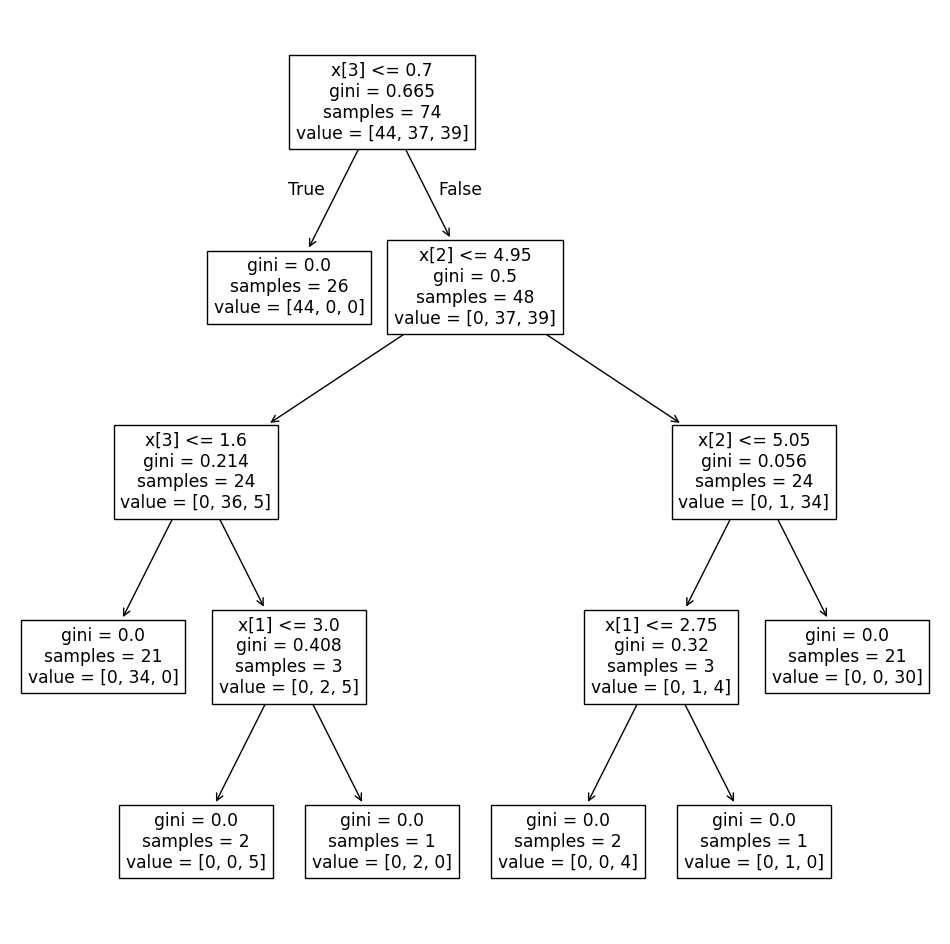

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12,12))
plot_tree(bg.estimators_[0])
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier
base=RandomForestClassifier(n_estimators=100)

In [31]:
base.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
y_pred1=base.predict(x_test)
y_pred1

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

* 1st tree dekhna chahti ho toh rf.estimators_[0],
* 2nd tree ke liye rf.estimators_[1] and so on...
* estimators=100 likha h n uske according kon si tree dekhna chahte ho 

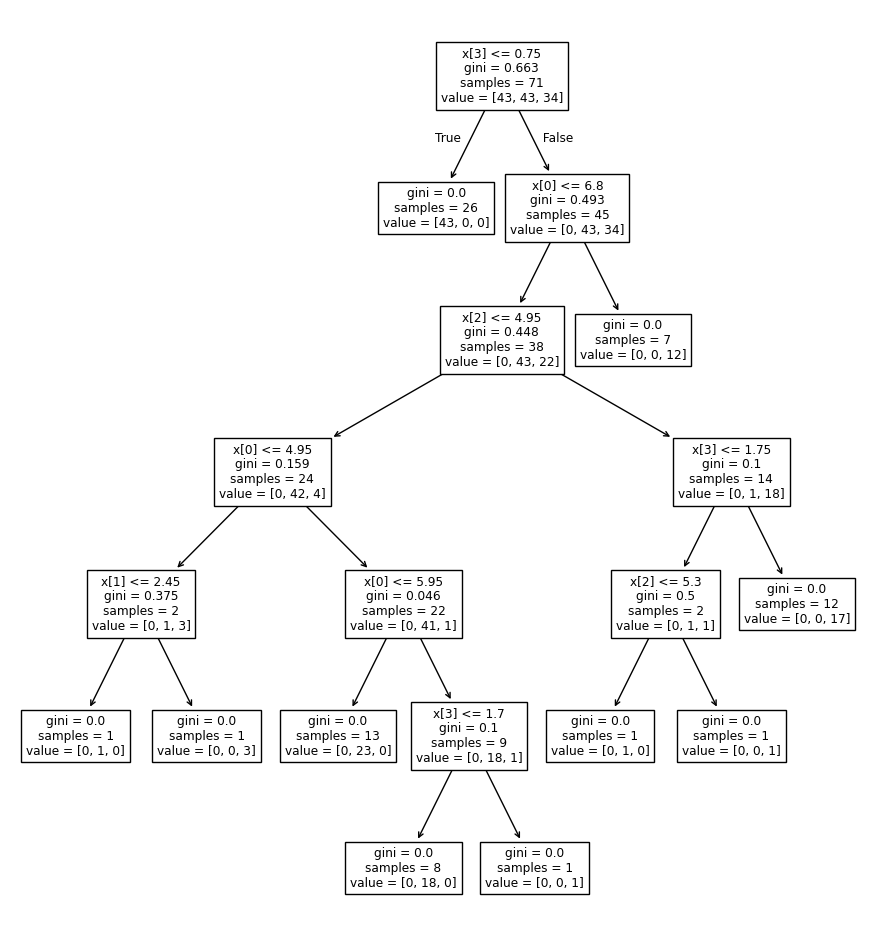

In [33]:
plt.figure(figsize=(11,12))
plot_tree(base.estimators_[4])
plt.show()


In [34]:
from sklearn.metrics import accuracy_score,classification_report

print("Bagging Accuracy:", bg.score(x_test, y_test))
print("Random Forest Accuracy:", base.score(x_test, y_test))

Bagging Accuracy: 1.0
Random Forest Accuracy: 1.0


In [35]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred,target_names=df.target_names)

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        10\n  versicolor       1.00      1.00      1.00         9\n   virginica       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'